# Temas Tratados en el Trabajo Práctico 2

* Conceptos de Búsqueda no Informada y Búsqueda Informada.

* Concepto de Heurística.

* Abstracción de Problemas como Gráficos de Árbol.

* Estrategias de Búsqueda no Informada: Primero en Amplitud, Primero en Profundidad y Profundidad Limitada.

* Estrategias de Búsqueda Informada: Búsqueda Voraz, Costo Uniforme, A*.


## Ejercicios Teóricos

1. ¿Qué diferencia hay entre una estrategia de búsqueda Informada y una estrategia de búsqueda No Informada?

Las estrategias de búsqueda no informada, al no disponer de información sobre los nodos, deben explorar el espacio de estados de manera sistemática pero indiscriminada, expandiendo nodos sin priorización inteligente. Esto las hace garantizar completitud pero las vuelve computacionalmente costosas en espacios de estados grandes.

Por el contrario, las estrategias de búsqueda informada utilizan funciones heurísticas que estiman la proximidad al objetivo, permitiendo dirigir la exploración hacia los nodos más prometedores. Esto las hace significativamente más eficientes, aunque esto depende de la calidad de la heurística empleada

2. ¿Qué es una heurística y para qué sirve?

La función heurística h(n) estima el costo mínimo desde el nodo n hasta un nodo objetivo, proporcionando al algorítmo información sobre qué dirección parece más prometedora. Aunque no garantiza una solución óptima, permite tomar decisiones inteligéntes que aceleran el proceso de búsqueda en problemas complejos

Por ejemplo en sistemas de navegación GPS la heurística seria "La distancia en línea recta (distancia euclidiana) hasta el objetivo". Esto ayuda al algoritmo a elegir primero caminos que van en la dirección correcta

3. ¿Es posible que un algoritmo de búsqueda no tenga solución?

Si, esto se puede deber a varios factores:

1. El problema no tiene solución.
2. El espacio de búsqueda es infinito
3. Limitaciones de recursos o diseño
4. El objetivo es inalcanzable

Un buen algoritmo de búsqueda debe ser capaz de reconocer y reportar cuando un problema no tiene solución. Para ello se deben diseñar algoritmos que detecten estados repetidos y tengan criterios de parada claros

4. Describa en qué secuencia será recorrido el Árbol de Búsqueda representado en la imagen cuando se aplica un Algoritmo de Búsqueda con la estrategia:

        4.1 Primero en Amplitud.

        4.2 Primero en Profundidad.

        4.3 Primero en Profundidad con Profundidad Limitada Iterativa (comenzando por un nivel de profundidad 1).

In [5]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1IJDEKWhfMEzXnzr28RgTNOuKBER2NsuP"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

ModuleNotFoundError: No module named 'requests'

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1IJDEKWhfMEzXnzr28RgTNOuKBER2NsuP"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

Muestre la respuesta en una tabla, indicando para cada paso que da el agente el nodo que evalúa actualmente y los que están en la pila/cola de expansión según corresponda.

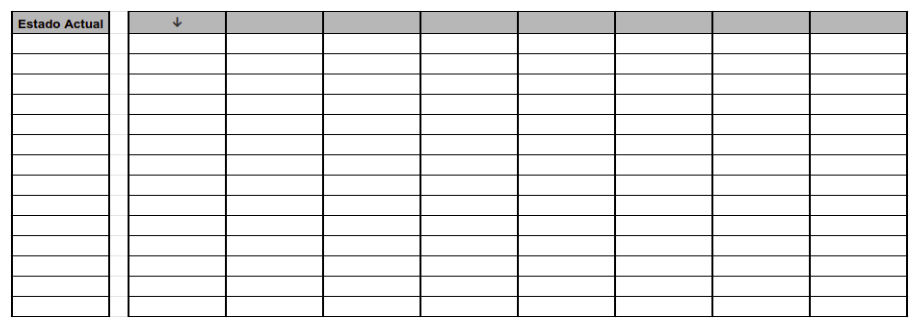

In [ ]:
url = "https://drive.google.com/uc?export=view&id=1fW_BgT5muzQffMVRcIiB2mM2Zf66Nb-m"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar con figura más grande
plt.figure(figsize=(img.width / 80, img.height / 80))  # ajustá el divisor según densidad deseada
plt.imshow(img)
plt.axis('off')
plt.show()

### Secuencias de Recorrido

![Primero en Amplitud](tabla_recorrido_primero_en_amplitud.png)

![Primero en profundidad](tabla_recorrido_primero_en_profundidad.png)

![Primero en profundidad con Profundidad Iterativa](tabla_recorrido_primero_en_profundidad_con_prof_iterativa.png)


## Ejercicios de Implementación

5. Represente el tablero mostrado en la imágen como un árbol de búsqueda y a continuación programe un agente capaz de navegar por el tablero para llegar desde la casilla I a la casilla F utilizando:

        5.1 La estrategia Primero en Profundidad.

        5.2 La estrategia Avara.

        5.3 La estrategia A*.

Considere los siguientes comportamientos del agente:

* El agente no podrá moverse a las casillas siguientes si las separa una pared.

* La heurística empleada en el problema es la Distancia de Manhattan hasta la casilla objetivo (el menor número de casillas adyacentes entre la casilla actual y la casilla objetivo).

* El costo de atravesar una casilla es de 1, a excepción de la casilla W, cuyo costo al atravesarla es 30.

* En caso de que varias casillas tengan el mismo valor para ser expandidas, el algoritmo eligirá en orden alfabético las casillas que debe visitar.

In [21]:
%pip install requests
import requests
from requests import get
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


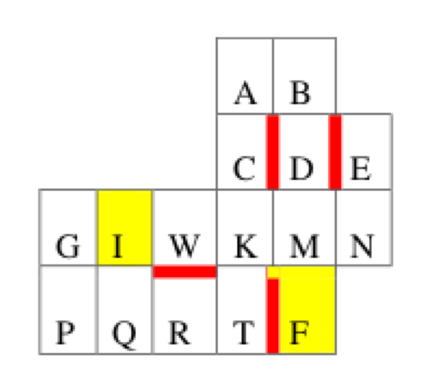

In [22]:
url = "https://drive.google.com/uc?export=view&id=1FajYiBQ507o6yiE7MndL-PQXyoyELtuD"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')
plt.show()

### Estructura general del Problema

Comenzamos definiendo y construyendo las clases que representan nuestro mundo o tablero.

Definimos las clases:
* Casilla
* Tablero

In [68]:
# Importo Librerias
import pygame
from enum import Enum
from typing import Dict, List, Set, Tuple, Optional

In [71]:
class TipoCasilla:
    VALIDO = 'valido'
    INVALIDO = 'invalido'
    INICIO = 'inicio'
    FINAL = 'final'

class Casilla:
    """
    Representa una casilla en el tablero.
    """
    def __init__(self, x, y, letra, tipo=TipoCasilla.VALIDO):
        self.x = x
        self.y = y
        self.letra = letra
        self.tipo = tipo
        self.pared_superior = False
        self.pared_inferior = False
        self.pared_izquierda = False
        self.pared_derecha = False
    
    def __str__(self):
        return f"Casilla({self.letra}, {self.x}, {self.y})"
    
    def configurar_paredes(self, superior=False, inferior=False, izquierda=False, derecha=False):
        """
        Permite modificar las paredes de la casilla directamente.
        """
        self.pared_superior = superior
        self.pared_inferior = inferior
        self.pared_izquierda = izquierda
        self.pared_derecha = derecha

    def obtener_adyacentes_validas(self, vecinos):
        adyacentes_validas = []
        if vecinos.get('arriba') and not self.pared_superior:
            adyacentes_validas.append(('Norte', vecinos['arriba']))
        if vecinos.get('abajo') and not self.pared_inferior:
            adyacentes_validas.append(('Sur', vecinos['abajo']))
        if vecinos.get('izquierda') and not self.pared_izquierda:
            adyacentes_validas.append(('Oeste', vecinos['izquierda']))
        if vecinos.get('derecha') and not self.pared_derecha:
            adyacentes_validas.append(('Este', vecinos['derecha']))
        return adyacentes_validas

In [78]:
# Clase para representar el tablero
class Tablero:
    def __init__(self, ancho=6, alto=4):
        self.ancho = ancho      # Número de columnas
        self.alto = alto        # Número de filas
        self.casillas = []      # Lista de listas de casillas
        self._crear_tablero_vacio()
    
    def _crear_tablero_vacio(self):
        """
        Crea un tablero vacío, inicializado con None.
        """
        self.casillas = [[None for _ in range(self.ancho)] for _ in range(self.alto)]

    def agregar_casilla(self, casilla, x, y):
        """
        Agrega una instancia de la clase Casilla en la posición (x, y)
        del tablero.
        """
        if 0 <= x < self.ancho and 0 <= y < self.alto:
            # Asegúrate de que la casilla sea una instancia de Casilla
            if isinstance(casilla, Casilla):
                self.casillas[y][x] = casilla
            else:
                print("Error: El objeto proporcionado no es una instancia de Casilla.")
        else:
            print("Error: Las coordenadas están fuera del rango del tablero.")

    def obtener_casilla(self, x, y):
        """
        Obtener una casilla específica si está dentro del rango.
        """
        if 0 <= x < self.ancho and 0 <= y < self.alto:
            return self.casillas[y][x]
        return None
    
    def rellenar_casilla(self, x, y, letra, tipo):
        """
        Rellena una casilla específica con una letra y tipo.
        """
        casilla = self.obtener_casilla(x, y)
        if casilla:
            casilla.letra = letra
            casilla.tipo = tipo

    def modificar_pared(self, x, y, superior=False, inferior=False, izquierda=False, derecha=False):
        """
        Modifica las paredes de una casilla específica.
        """
        casilla = self.obtener_casilla(x, y)
        if casilla:
            casilla.configurar_paredes(superior, inferior, izquierda, derecha)

    def crear_tablero_especifico(self, tablero_config):
        """
        Crea el tablero de la imagen a partir de una configuración.
        tablero_config es un diccionario de la forma {(x, y): {'letra': 'X', 'tipo': TipoCasilla.VALIDO, 'paredes': {...}}}
        """
        for (x, y), data in tablero_config.items():
            letra = data.get('letra', '')
            tipo = data.get('tipo', TipoCasilla.VALIDO)
            casilla = Casilla(x, y, letra, tipo)
            self.agregar_casilla(casilla, x, y)
            paredes = data.get('paredes', {})
            self.modificar_pared(x, y, **paredes)
    

    def dibujar_tablero(self):
        """
        Dibuja el tablero en la consola para una fácil visualización.
        """
        print("\n--- Tablero ---")
        for y in range(self.alto):
            fila_superior = ""
            fila_letras = ""
            for x in range(self.ancho):
                casilla = self.obtener_casilla(x, y)
                if casilla:
                    fila_letras += f"| {casilla.letra} "
                    # Dibujar pared superior
                    if casilla.pared_superior:
                        fila_superior += "+---"
                    else:
                        fila_superior += "+---"
                else:
                    fila_letras += "|   "
                    fila_superior += "+---"
            
            print(fila_superior + "+")
            print(fila_letras + "|")
        
        # Dibujar la última línea horizontal
        ultima_fila = ""
        for x in range(self.ancho):
            ultima_fila += "+---"
        print(ultima_fila + "+")
        print("---------------")


In [82]:
class Agente:
    def __init__(self, tablero, casilla_inicial=None):
        self.tablero = tablero
        if casilla_inicial:
            self.casilla_actual = casilla_inicial
        else:
            self.casilla_actual = self.buscar_casilla_inicio()
        self.visitadas = set() # Conjunto para guardar las casillas visitadas

    def buscar_casilla_inicio(self):
        for y in range(self.tablero.alto):
            for x in range(self.tablero.ancho):
                casilla = self.tablero.obtener_casilla(x, y)
                if casilla and casilla.tipo == TipoCasilla.INICIO:
                    return casilla
        return None

    def obtener_adyacentes_sin_paredes(self, casilla):
        x, y = casilla.x, casilla.y
        vecinos = {
            'arriba': self.tablero.obtener_casilla(x, y - 1),
            'abajo': self.tablero.obtener_casilla(x, y + 1),
            'izquierda': self.tablero.obtener_casilla(x - 1, y),
            'derecha': self.tablero.obtener_casilla(x + 1, y),
        }
        return casilla.obtener_adyacentes_validas(vecinos)
    
    def buscar_primero_en_profundidad(self):
        """
        Realiza una búsqueda primero en profundidad desde la casilla de inicio.
        Muestra la secuencia de casillas por las que pasa el agente.
        """
        pila = [self.casilla_actual] # Utilizamos una lista como pila (LIFO)
        self.visitadas.add(self.casilla_actual)
        
        recorrido = [self.casilla_actual] # Almacena el recorrido para mostrarlo al final

        while pila:
            self.casilla_actual = pila.pop()
            print(f"Agente en: {self.casilla_actual.letra}")

            if self.casilla_actual.tipo == TipoCasilla.FINAL:
                print("¡Objetivo encontrado!")
                print("Recorrido completo:", " -> ".join([c.letra for c in recorrido]))
                return recorrido
            
            # Obtener vecinos no visitados y ordenarlos alfabéticamente
            vecinos = self.obtener_adyacentes_sin_paredes(self.casilla_actual)
            vecinos_no_visitados = []
            for _, casilla_vecina in vecinos:
                if casilla_vecina and casilla_vecina not in self.visitadas:
                    vecinos_no_visitados.append(casilla_vecina)
            
            # Ordenar por el nombre de la letra
            vecinos_no_visitados.sort(key=lambda c: c.letra)
            
            # Poner los vecinos en la pila en orden inverso para que la búsqueda priorice el orden alfabético
            for vecino in reversed(vecinos_no_visitados):
                pila.append(vecino)
                self.visitadas.add(vecino)
                recorrido.append(vecino)
        
        print("No se encontró un camino hacia la casilla final.")
        return None

In [83]:
# Definición del tablero de la imagen
# Las coordenadas son (columna, fila)
# Origen (0,0) en la esquina superior izquierda
configuracion_tablero_imagen = {
    # Fila 0
    (3, 0): {'letra': 'A', 'tipo': TipoCasilla.VALIDO},
    (4, 0): {'letra': 'B', 'tipo': TipoCasilla.VALIDO},

    # Fila 1
    (3, 1): {'letra': 'C', 'tipo': TipoCasilla.VALIDO, 'paredes': {'derecha': True}},
    (4, 1): {'letra': 'D', 'tipo': TipoCasilla.VALIDO, 'paredes': {'izquierda': True, 'derecha': True}},
    (5, 1): {'letra': 'E', 'tipo': TipoCasilla.VALIDO, 'paredes': {'izquierda': True}},

    # Fila 2
    (0, 2): {'letra': 'G', 'tipo': TipoCasilla.VALIDO},
    (1, 2): {'letra': 'I', 'tipo': TipoCasilla.INICIO},
    (2, 2): {'letra': 'W', 'tipo': TipoCasilla.VALIDO, 'paredes': {'inferior': True}},
    (3, 2): {'letra': 'K', 'tipo': TipoCasilla.VALIDO},
    (4, 2): {'letra': 'M', 'tipo': TipoCasilla.VALIDO},
    (5, 2): {'letra': 'N', 'tipo': TipoCasilla.VALIDO},

    # Fila 3
    (0, 3): {'letra': 'P', 'tipo': TipoCasilla.VALIDO},
    (1, 3): {'letra': 'Q', 'tipo': TipoCasilla.VALIDO},
    (2, 3): {'letra': 'R', 'tipo': TipoCasilla.VALIDO, 'paredes': {'superior': True}},
    (3, 3): {'letra': 'T', 'tipo': TipoCasilla.VALIDO, 'paredes': {'derecha': True}},
    (4, 3): {'letra': 'F', 'tipo': TipoCasilla.FINAL, 'paredes': {'izquierda': True}}
}

# Creación e inicialización del tablero
mi_tablero = Tablero(ancho=6, alto=4)
mi_tablero.crear_tablero_especifico(configuracion_tablero_imagen)

agente_dfs = Agente(mi_tablero)

print("Iniciando búsqueda primero en profundidad...")
agente_dfs.buscar_primero_en_profundidad()

# Muestra el tablero para verificar la creación
mi_tablero.dibujar_tablero()

Iniciando búsqueda primero en profundidad...
Agente en: I
Agente en: G
Agente en: P
Agente en: Q
Agente en: R
Agente en: T
Agente en: K
Agente en: C
Agente en: A
Agente en: B
Agente en: D
Agente en: M
Agente en: F
¡Objetivo encontrado!
Recorrido completo: I -> W -> Q -> G -> P -> R -> T -> K -> M -> C -> A -> B -> D -> N -> F

--- Tablero ---
+---+---+---+---+---+---+
|   |   |   | A | B |   |
+---+---+---+---+---+---+
|   |   |   | C | D | E |
+---+---+---+---+---+---+
| G | I | W | K | M | N |
+---+---+---+---+---+---+
| P | Q | R | T | F |   |
+---+---+---+---+---+---+
---------------


6. Desarrolle un agente que emplee una estrategia de búsqueda A* para ir de una casilla a otra evitando la pared representada, pudiendo seleccionar ustedes mismos el inicio y el final. Muestre en una imagen el camino obtenido.

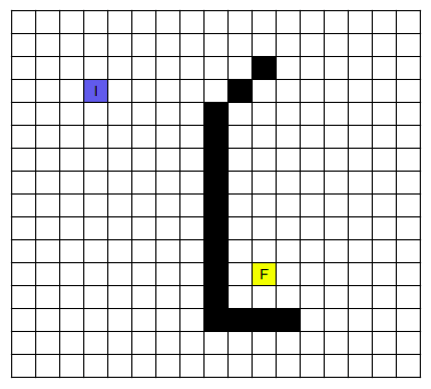

In [54]:
url = "https://drive.google.com/uc?export=view&id=1fD2Ws5oqFU9_RTj-yX9BIvslXJiqcLCZ"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. Representación del laberinto como una matriz de 30x30
# 0 = camino, 1 = pared
maze = np.zeros((30, 30), dtype=int)

# Coordenadas de la pared ajustadas a la matriz 30x30
# La pared se ha movido a la columna 18
wall_coords = [
    (10, 18), (10, 19),
    (11, 18), (12, 18), (13, 18), (14, 18), (15, 18),
    (16, 18), (17, 18), (18, 18), (19, 18), (20, 18),
    (20, 19), (20, 20), (20, 21)
]
for r, c in wall_coords:
    maze[r, c] = 1

# 2. Entrada de usuario para las coordenadas
print("Por favor, ingrese las coordenadas (fila, columna) para el inicio y el fin.")
print("Las coordenadas deben estar entre 0 y 29.")
try:
    start_row = int(input("Fila de inicio: "))
    start_col = int(input("Columna de inicio: "))
    end_row = int(input("Fila de fin: "))
    end_col = int(input("Columna de fin: "))
    
    start = (start_row, start_col)
    end = (end_row, end_col)

    # Verificación de coordenadas
    if not (0 <= start[0] < 30 and 0 <= start[1] < 30 and 0 <= end[0] < 30 and 0 <= end[1] < 30):
        print("Error: Las coordenadas deben estar en el rango de 0 a 29.")
    elif maze[start[0]][start[1]] == 1 or maze[end[0]][end[1]] == 1:
        print("Error: No puedes iniciar o terminar dentro de una pared.")
    else:
        # 3. Clase Node y el Algoritmo A* (sin cambios)
        class Node:
            def __init__(self, parent=None, position=None):
                self.parent = parent
                self.position = position
                self.g = 0
                self.h = 0
                self.f = 0

            def __eq__(self, other):
                return self.position == other.position

        def a_star_search(maze, start, end):
            start_node = Node(None, start)
            end_node = Node(None, end)
            open_list = []
            closed_list = []
            open_list.append(start_node)

            while open_list:
                current_node = min(open_list, key=lambda node: node.f)
                open_list.remove(current_node)
                closed_list.append(current_node)

                if current_node == end_node:
                    path = []
                    current = current_node
                    while current is not None:
                        path.append(current.position)
                        current = current.parent
                    return path[::-1]

                children = []
                for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                    node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

                    if (node_position[0] > (len(maze) - 1) or node_position[0] < 0 or
                        node_position[1] > (len(maze[0]) - 1) or node_position[1] < 0):
                        continue
                    if maze[node_position[0]][node_position[1]] == 1:
                        continue

                    new_node = Node(current_node, node_position)
                    children.append(new_node)

                for child in children:
                    if child in closed_list:
                        continue
                    child.g = current_node.g + 1
                    child.h = abs(child.position[0] - end_node.position[0]) + abs(child.position[1] - end_node.position[1])
                    child.f = child.g + child.h
                    
                    if any(open_node.position == child.position and child.g >= open_node.g for open_node in open_list):
                        continue

                    open_list.append(child)
            return None

        # 4. Ejecución y Visualización
        path = a_star_search(maze, start, end)

        if path:
            print("Camino encontrado:", path)
            path_map = np.array(maze, dtype=float)
            for row, col in path:
                path_map[row, col] = 0.5
            
            cmap = ListedColormap(['white', 'black', 'green'])
            plt.imshow(path_map, cmap=cmap)
            
            plt.scatter(start[1], start[0], c='blue', marker='s', s=100, label='Inicio')
            plt.scatter(end[1], end[0], c='yellow', marker='s', s=100, label='Fin')
            
            plt.title('Búsqueda A* en un Tablero Más Grande')
            plt.legend()
            plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
            plt.show()
        else:
            print("No se encontró un camino.")

except ValueError:
    print("Entrada inválida. Por favor, ingrese solo números enteros.")



![Laberinto del Ejericio 6 para un caso en el que esquiva la pared](laberinto.png)

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)